In [1]:
import sys
sys.path.append('../')
import numpy as np
from clfanalysis.predict import run_classifier_predictions

# Data

In [2]:
DataParams = {}


clf_flag = 'rf' 
datafile_p = '115434' 

DataParams['N'] = 6
DataParams['prefix']  = './CE_ramseydata/'
DataParams['year']  = '2018'
DataParams['date']  = '20181010'
DataParams['brightID']  = '115321'
DataParams['darkID']  = '115302'
DataParams['img_shape']  = (11, 38)
DataParams['cycles']  = 500 
DataParams['save'] = '_ramsey'

binary_data = []
binary_reweighted = []
rho_0_data = []
rho_1_data =[]
pi_data = []

# Classification Analysis

In [3]:
for ionpos in range(DataParams['N']):
    print()
    print('Ion number', ionpos + 1)
    
    pred, wpred, rho0, rho1, pi = run_classifier_predictions(ionpos, clf_flag, datafile_p, **DataParams)
    
    binary_data.append(pred)
    binary_reweighted.append(wpred)
    rho_0_data += rho0
    rho_1_data += rho1
    pi_data +=pi 
    
    np.savez(clf_flag+'_fulldata'+DataParams['save'], 
             DataParams=DataParams, 
             binary_data=binary_data, 
             rho_0_data=rho_0_data,
             rho_1_data=rho_1_data,
             pi_data=pi_data, 
             binary_rewieghted=binary_reweighted)
    

    


Ion number 1
Making a prediction 0 estf 0.94 0.0
Making a prediction 0 bare 0.94 0.0
Making a prediction 1 estf 0.95 0.94
Making a prediction 1 bare 0.95 0.94
Making a prediction 2 estf 0.96 0.95
Making a prediction 2 bare 0.96 0.95
Making a prediction 3 estf 0.97 0.96
Making a prediction 3 bare 0.97 0.96
Making a prediction 5 estf 0.98 0.97
Making a prediction 5 bare 0.98 0.97
Making a prediction 6 estf 1.0 0.98
Making a prediction 6 bare 1.0 0.98

Ion number 2
Making a prediction 0 estf 0.94 0.0
Making a prediction 0 bare 0.94 0.0
Making a prediction 1 estf 0.96 0.94
Making a prediction 1 bare 0.96 0.94
Making a prediction 2 estf 0.97 0.96
Making a prediction 3 estf 1.0 0.97
Making a prediction 3 bare 1.0 0.96

Ion number 3
Making a prediction 0 estf 0.96 0.0
Making a prediction 0 bare 0.95 0.0
Making a prediction 1 estf 0.98 0.96
Making a prediction 1 bare 0.98 0.95
Making a prediction 2 bare 0.99 0.98
Making a prediction 9 estf 0.99 0.98

Ion number 4
Making a prediction 0 estf 0.

0.011270538507021706 0.0002140810557627067 0.49423052180520155


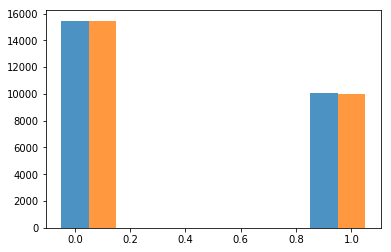

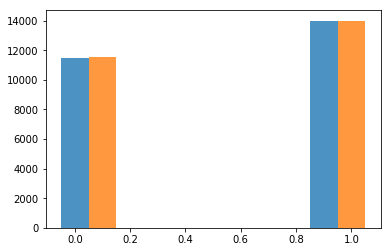

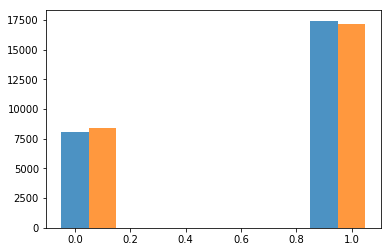

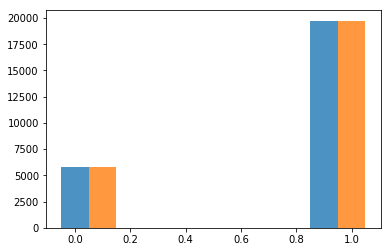

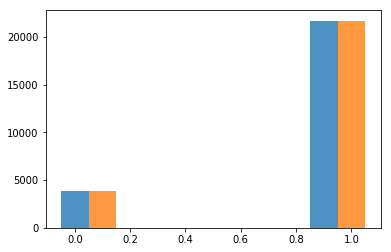

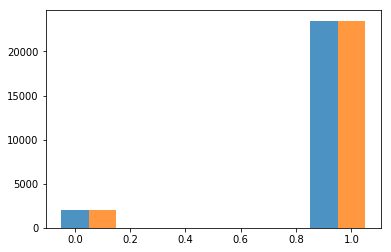

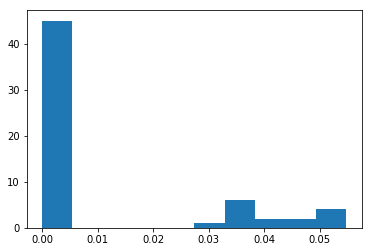

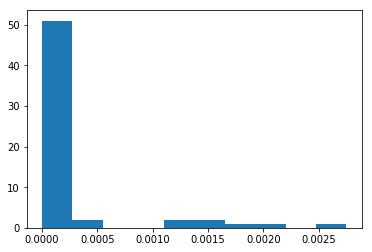

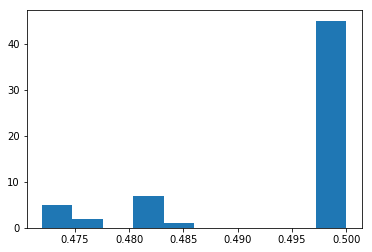

In [4]:
print(np.mean(np.asarray(rho_0_data)), np.mean(np.asarray(rho_1_data)),np.mean(np.asarray(pi_data)))


import matplotlib.pyplot as plt
clairesdata = np.load('./CE_ramseydata/20181010-115434ion_bright_matrix.npz')['labels_bright']
claire_matrix = clairesdata.reshape(6, 51*500)

for idx in range(6):
    plt.figure()
    plt.hist(binary_reweighted[idx] - 0.05, alpha=0.8)
    plt.hist(binary_data[idx] + 0.05, alpha=0.8)
    # plt.hist(claire_matrix[idx] +0.05  , alpha=0.5)
    plt.show()

plt.figure()
plt.hist(np.asarray(rho_0_data))
plt.show()

plt.figure()
plt.hist(np.asarray(rho_1_data))
plt.show()

plt.figure()
plt.hist(np.asarray(pi_data))
plt.show()